© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0


This notebook was created by Alexander Jüstel and is part of the DGE Rollout Heat Demand Mapping project carried out by students of RWTH Aachen University within the framework of their master thesis. 

# 01 Creating Masks for Interreg NWE Region for later intersection with input data

This notebook illustrates how to create an Interreg NWE wide mask (10 km) that is needed for the intersection with the input data. These larger masks are needed to ensure that there are no overlaps or gaps at boundaries of provided input data sets. The resulting 10 km-mask will be used to create smaller 100 m-masks in the following notebooks. 

## Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from tqdm import tqdm

import sys 
sys.path.insert(0, '../pyhd/')
import processing

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading the Interreg NWE Region

Here, we load the polygons of each country as `GeoDataFrame` to define the mask using `GeoPandas`.

In [2]:
interreg_new_region = gpd.read_file('../data/Interreg_NWE_NUTS0_3034.shp')
interreg_new_region['area'] = interreg_new_region.area
interreg_new_region

,NAME_LATN,NUTS_NAME,area2,geometry,area
0,France,France,260768,"MULTIPOLYGON (((2930641.617 2531547.039, 29306...",2.607676e+11
1,Great Britain,Great Britain,154556,"MULTIPOLYGON (((2874711.281 2699278.506, 28747...",1.545561e+11
2,Ireland,Ireland,65150,"MULTIPOLYGON (((2651794.967 2994393.242, 26518...",6.514953e+10
3,Netherlands,Netherlands,26826,"MULTIPOLYGON (((3667957.194 2938854.305, 36680...",2.682582e+10
4,Scotland,Scotland,74237,"MULTIPOLYGON (((3075395.957 3245560.731, 30753...",7.423735e+10
5,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,38663,"POLYGON ((3963266.327 2322163.044, 3963280.662...",3.866341e+10
6,Luxembourg,Luxembourg,2421,"POLYGON ((3733429.004 2606067.737, 3733284.924...",2.421410e+09
7,Germany,Germany,136800,"MULTIPOLYGON (((3954764.925 2330292.165, 39546...",1.368000e+11
8,Belgium,Belgium,28595,"MULTIPOLYGON (((3496569.868 2727532.821, 34976...",2.859470e+10


## Plotting the Interreg NWE Region

The boundaries are plotted using `matplotlib`. 

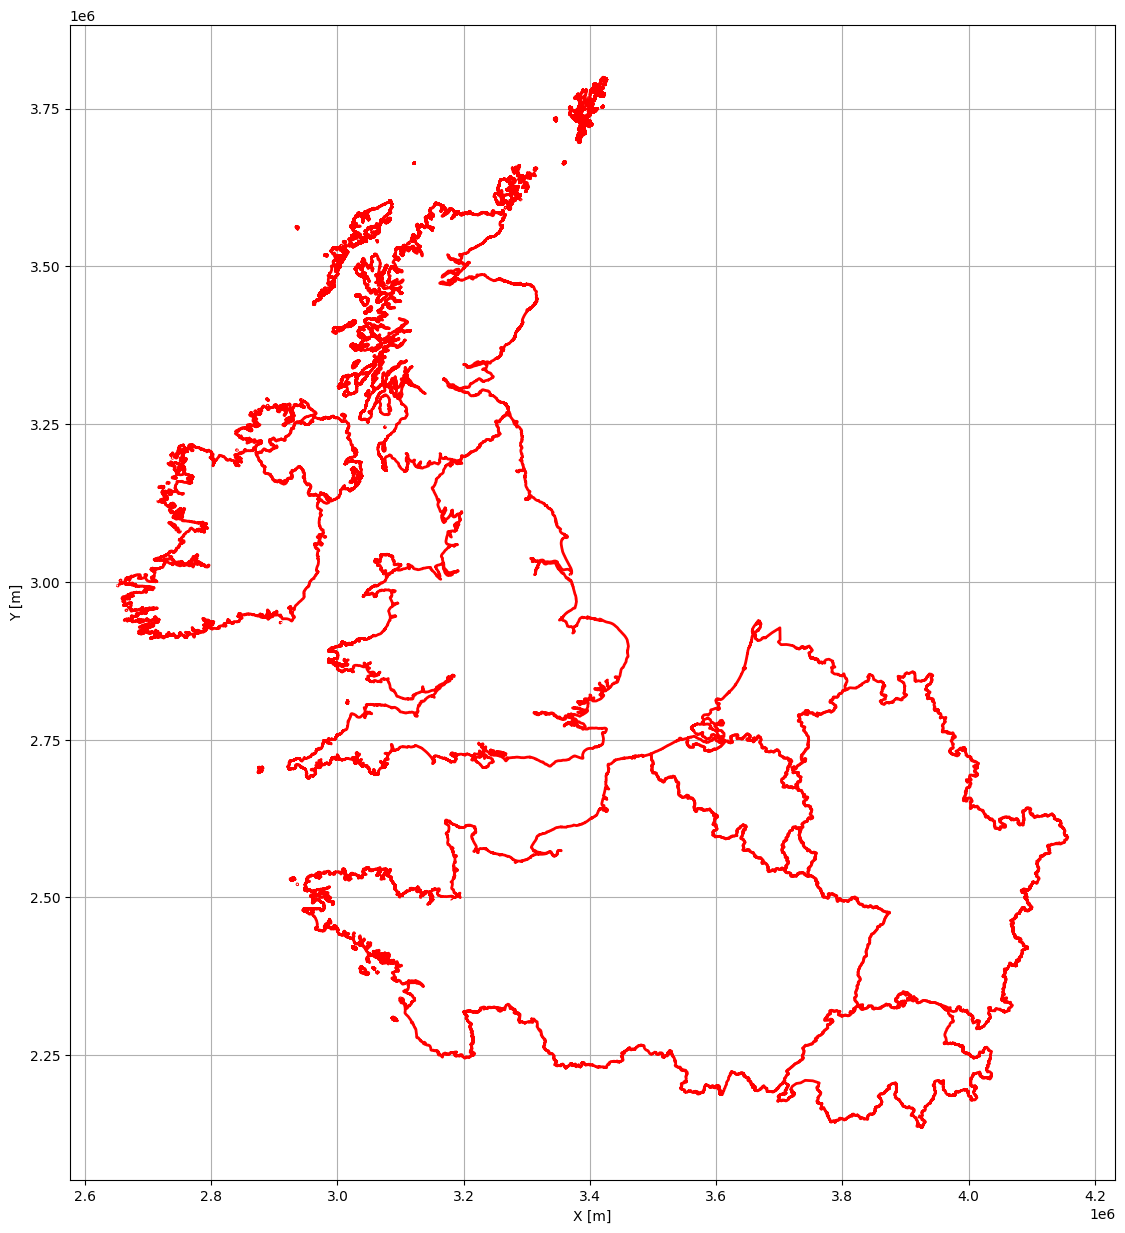

In [3]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

## Defining the boundaries of the mask

The boundaries of the mask will be defined by the total bounds of the Interreg NWE Region. A `Shapely` `Polygon` will be created from the total bounds of the countries and converted into a `GeoDataFrame`.

In [4]:
interreg_new_region.total_bounds

array([2651470.87678118, 2135999.35335579, 4157176.32888511,
       3799567.81291717])

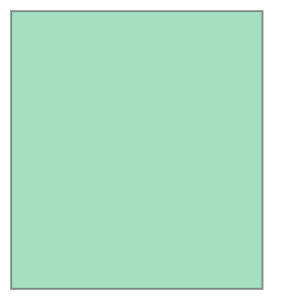

In [5]:
polygon = box(*interreg_new_region.total_bounds)
polygon

In [6]:
interreg_new_region_polygon = gpd.GeoDataFrame(geometry=[polygon],
                                               crs='EPSG:3034')
interreg_new_region_polygon

,geometry
0,"POLYGON ((4157176.329 2135999.353, 4157176.329..."


## Saving the Outline
The Polygon Outline will be saved to file.

## Plotting the Interreg NWE Region and the Polygon

The boundaries and the outline are plotted using `matplotlib`.

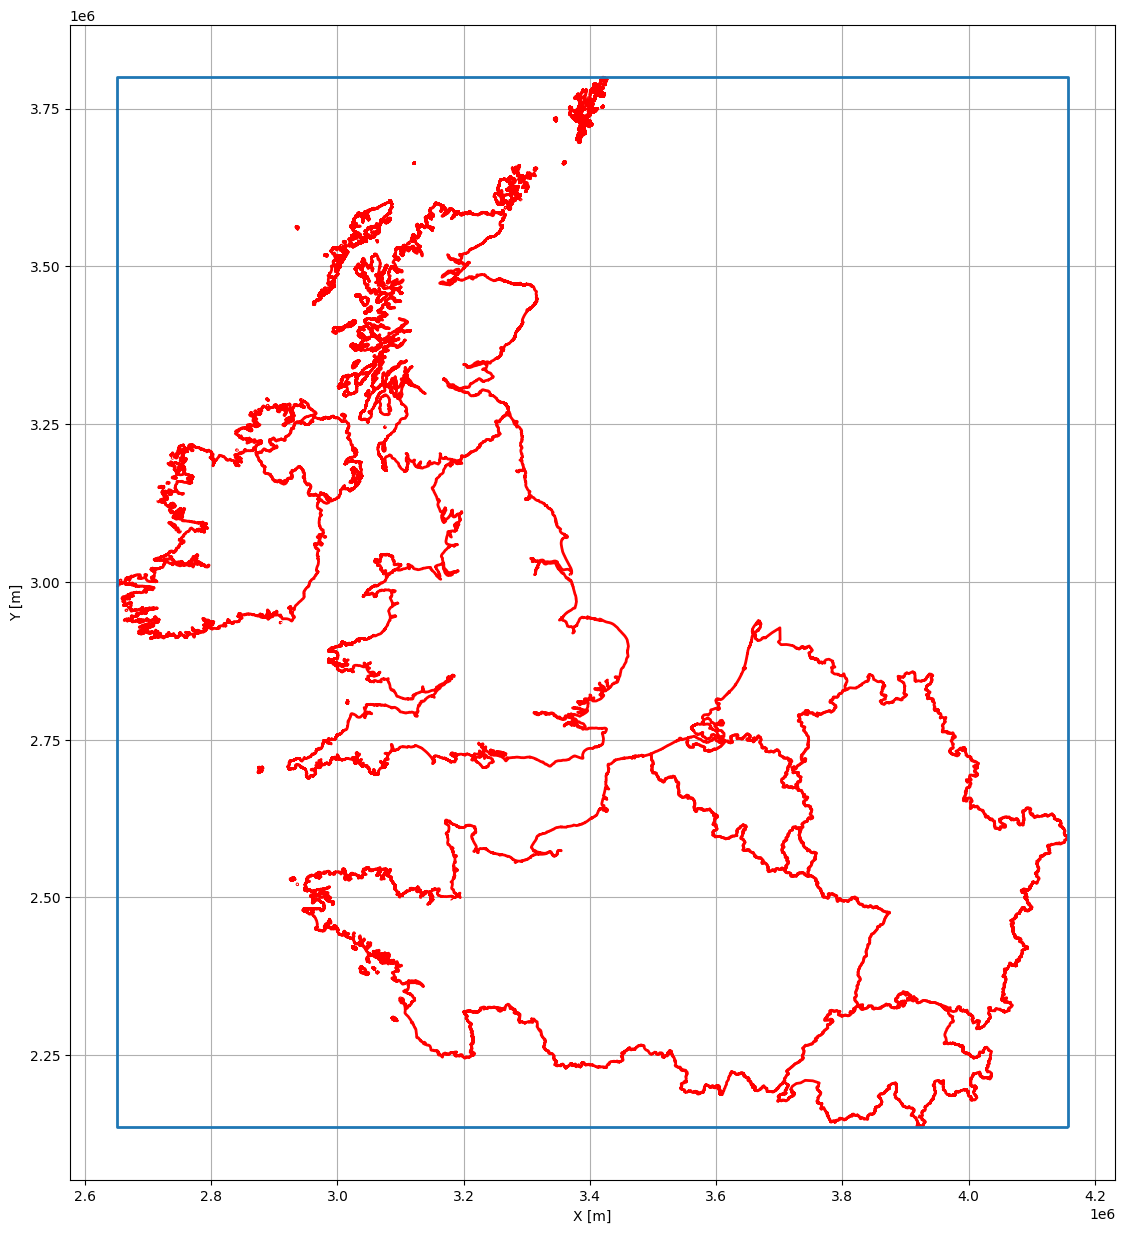

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
interreg_new_region_polygon.boundary.plot(ax=ax, linewidth=2)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

## Creating 10x10 km2 mask

In a first step, a mask with cells of 10x10 km2 each will be created. 

In [8]:
interreg_new_region_mask_10km = processing.create_polygon_mask(gdf=interreg_new_region_polygon, 
                                                               step_size=10000)
interreg_new_region_mask_10km

,geometry
0,"POLYGON ((2651470.877 2135999.353, 2661470.877..."
1,"POLYGON ((2651470.877 2145999.353, 2661470.877..."
2,"POLYGON ((2651470.877 2155999.353, 2661470.877..."
3,"POLYGON ((2651470.877 2165999.353, 2661470.877..."
4,"POLYGON ((2651470.877 2175999.353, 2661470.877..."
...,...
25212,"POLYGON ((4151470.877 3755999.353, 4161470.877..."
25213,"POLYGON ((4151470.877 3765999.353, 4161470.877..."
25214,"POLYGON ((4151470.877 3775999.353, 4161470.877..."
25215,"POLYGON ((4151470.877 3785999.353, 4161470.877..."


In [9]:
interreg_new_region_mask_10km.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

## Plotting the mask
The boundaries, outlines and mask polygons are plotted using `matplotlib`.

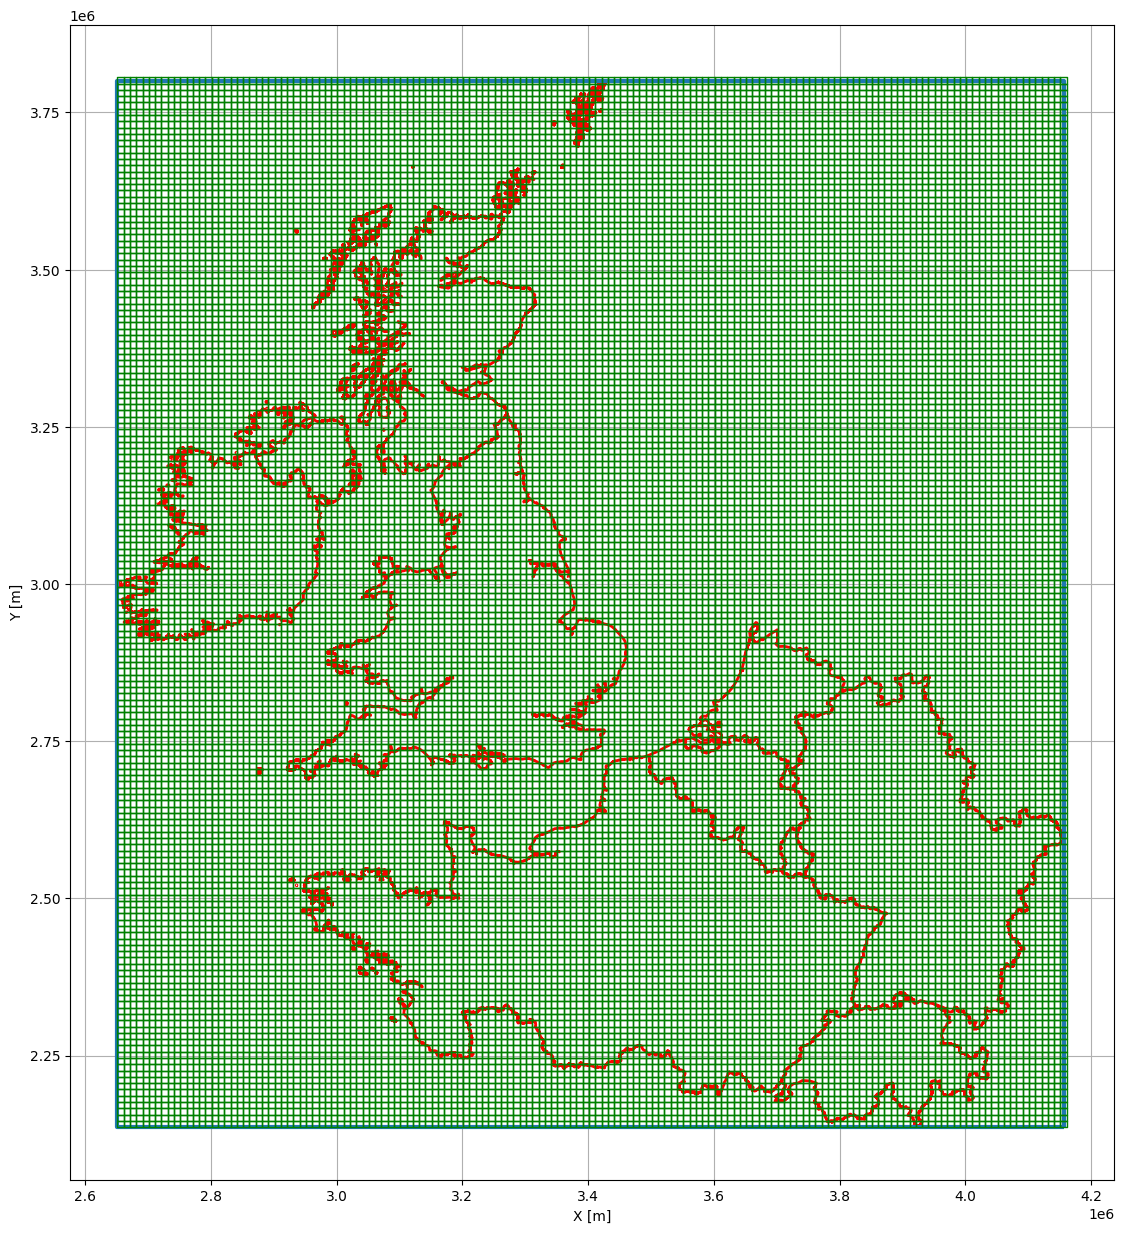

In [10]:
fig, ax = plt.subplots(figsize=(20,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=2, color='red')
interreg_new_region_polygon.boundary.plot(ax=ax, linewidth=3)
interreg_new_region_mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

## Crop GeoDataFrame

The mask `GeoDataFrame` is cropped to the outline of the countries to save storage space and to accelerate loading times.

In [11]:
interreg_new_region_mask_10km = interreg_new_region_mask_10km.sjoin(interreg_new_region).reset_index()[['geometry']]
interreg_new_region_mask_10km

,geometry
0,"POLYGON ((2651470.877 2955999.353, 2661470.877..."
1,"POLYGON ((2651470.877 2965999.353, 2661470.877..."
2,"POLYGON ((2651470.877 2975999.353, 2661470.877..."
3,"POLYGON ((2651470.877 2985999.353, 2661470.877..."
4,"POLYGON ((2651470.877 2995999.353, 2661470.877..."
...,...
9225,"POLYGON ((4141470.877 2605999.353, 4151470.877..."
9226,"POLYGON ((4141470.877 2615999.353, 4151470.877..."
9227,"POLYGON ((4151470.877 2585999.353, 4161470.877..."
9228,"POLYGON ((4151470.877 2595999.353, 4161470.877..."


In [12]:
interreg_new_region_mask_10km.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

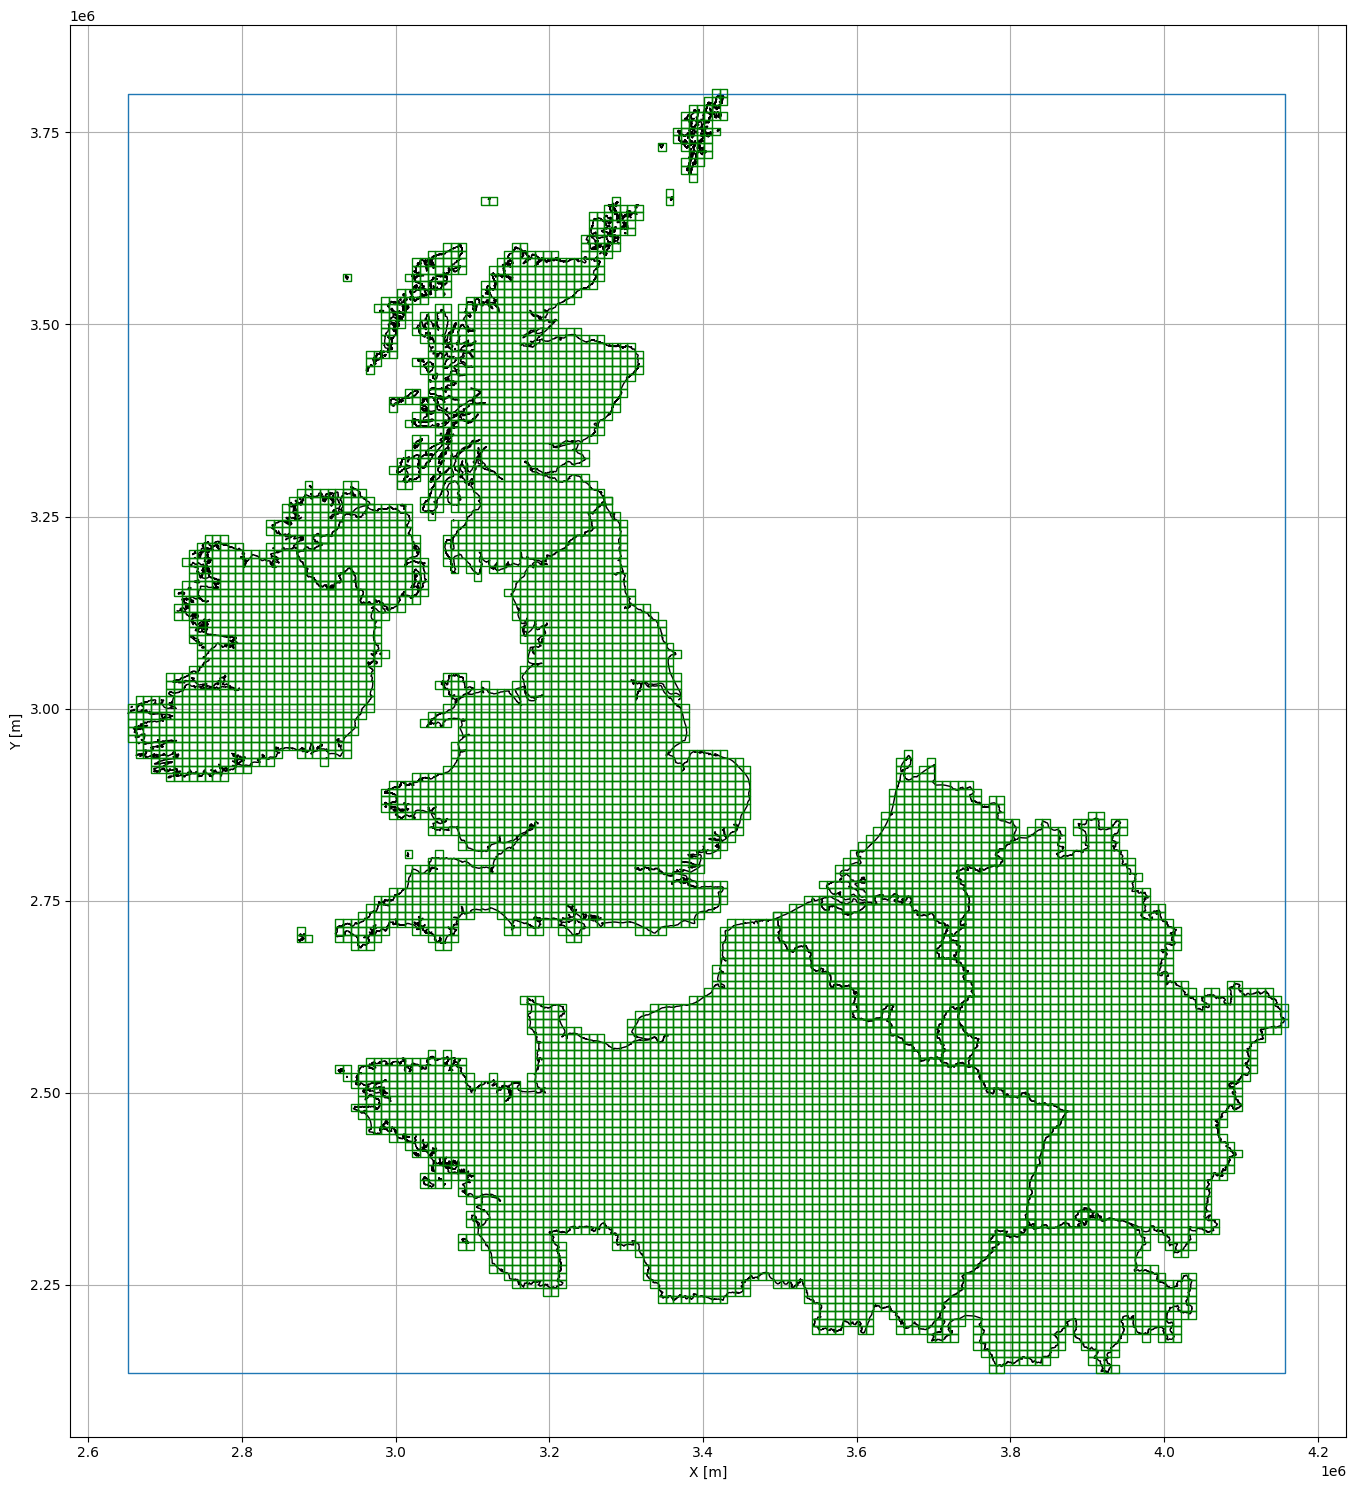

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
interreg_new_region.boundary.plot(ax=ax, linewidth=1, color='black')
interreg_new_region_polygon.boundary.plot(ax=ax, linewidth=1)
interreg_new_region_mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()
# plt.savefig('../images/Interreg_Mask.png', dpi=300)

## Saving Mask

The 10km-mask is saved to file.